### Домашняя работа "Оценка точности модели, переобучение, регуляризация"

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Потроить график Precision - Recall на этих же данных.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
X = data.iloc[:, :-1]
Y = data['affair']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=146)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict_proba(x_test)

In [12]:
model.score(x_test, y_test)

0.7146596858638743

In [61]:
def find_fpr_tpr_prec_recall(predictions, y_test, treshold, find_precision=False):
    '''функция вручную считает значения для матрицы ошибок
    В зависимости от флага find_precision возвращает пару значений precision-recall или пару значений fpr-tpr'''
    tp = 0 
    fp = 0 
    fn = 0 
    tn = 0 

    for predicted_prob, actual in zip(predictions[:, 1], y_test): 
        predicted=0
        if predicted_prob >= treshold:
            predicted = 1 

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    if tp+fp==0:
        precision = None
    else:
        precision = tp / (tp + fp)
        
    recall = tp / (tp + fn)
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    if find_precision:
        return precision, recall
    
    return tpr, fpr


In [62]:
thresholds = np.linspace(0, 1, 100)

In [63]:
tpr_list=[]
fpr_list=[]
for i in range(len(thresholds)):
    tpr, fpr = find_fpr_tpr_prec_recall(y_pred, y_test, thresholds[i])
    tpr_list.append(tpr)
    fpr_list.append(fpr)

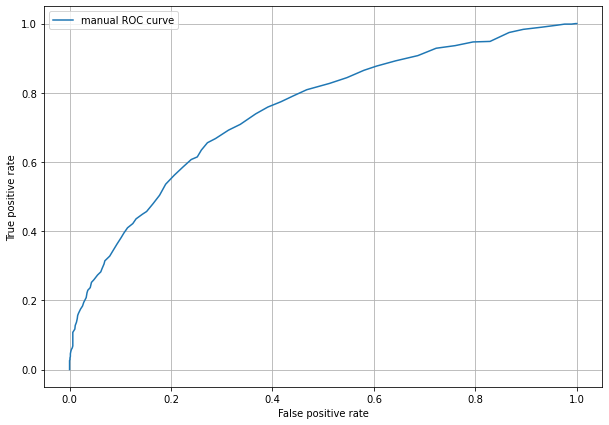

In [64]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(fpr_list,tpr_list, label='manual ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

In [65]:
from sklearn.metrics import roc_curve

In [66]:
fpr2, tpr2, thres = roc_curve(y_test, y_pred[:, 1])

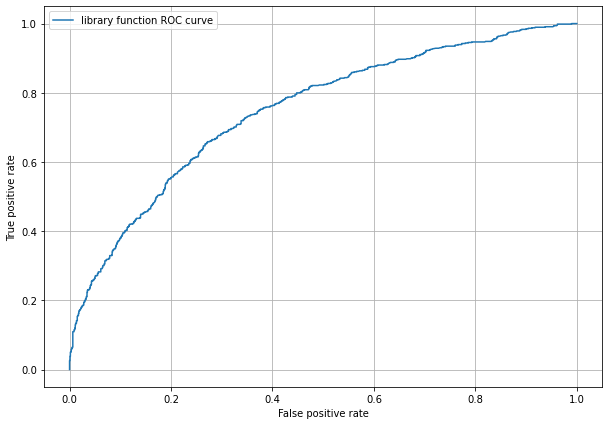

In [67]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(fpr2,tpr2, label='library function ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

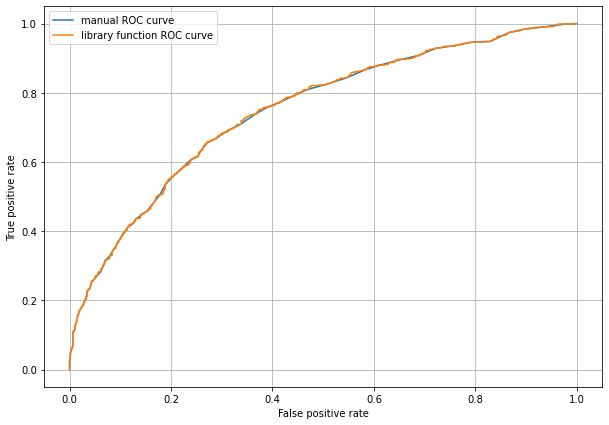

In [68]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(fpr_list,tpr_list, label='manual ROC curve')
plt.plot(fpr2,tpr2, label='library function ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

При построении графика ROC AUC вручную линия получилась более сглаженной за счет того, что изначально я взяла меньшее количество различных пороговых значений threshold (100 точек в пределах от 0 до 1), а если мы посмотрим на длину массивов tpr2 и fpr2, полученных при использовании библиотечной функции, то увидим, что там содержится по 821 значений.   
Однако при наложении друг на друга графики ROC AUC, построенные вручную и штатными средствами, фактически совпадают

In [69]:
prec_list=[]
recall_list=[]
for i in range(len(thresholds)):
    precision, recall = find_fpr_tpr_prec_recall(y_pred, y_test, thresholds[i], find_precision=True)
    prec_list.append(precision)
    recall_list.append(recall)
    

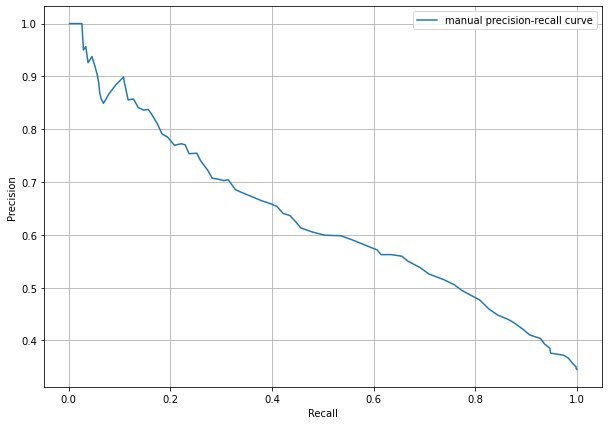

In [70]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(recall_list,prec_list, label='manual precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [71]:
from sklearn.metrics import precision_recall_curve

In [72]:
pr, re, thres = precision_recall_curve(y_test, y_pred[:, 1])

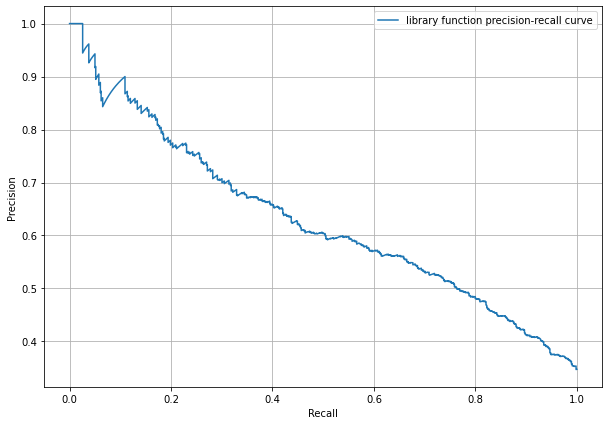

In [73]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(re,pr, label='library function precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

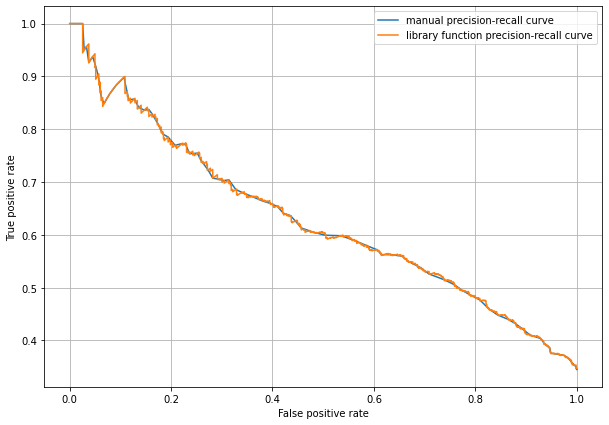

In [74]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(recall_list,prec_list, label='manual precision-recall curve')
plt.plot(re,pr, label='library function precision-recall curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

Аналогично предыдущему случаю кривая, построенная вручную, выглядит более сглаженной за счет меньшего количества использованных значений, но поведение графиков идентичное